In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
feature_na = [i for i in train.columns if train[i].isnull().sum()>1]
feature_na

['Age', 'Cabin', 'Embarked']

In [6]:
for i in feature_na: 
    x= np.round(test[i].isnull().mean(),2)
    print(i,  x,'% missing values')

Age 0.21 % missing values
Cabin 0.78 % missing values
Embarked 0.0 % missing values


In [7]:
def conv(df) :
    em = {'S': 1,'C': 2,'Q': 3,np.nan:np.nan}
    sex = {'male':1,"female":2}
    df["Embarked"] = df.Embarked.map(em)
    df["Sex"] = df.Sex.map(sex)
    return df

In [8]:
train = conv(train)
test = conv(test)

In [9]:
def cleaning_data(df) :
    data = df.drop(['Cabin'], axis=1)
    mean_value_age = np.round(data['Age'].mean(),2)
    mean_value_e = np.round(data['Embarked'].mean(),0 )
    data['Age'] = data['Age'].fillna(value=mean_value_age,inplace=False)
    data['Embarked'] = data['Embarked'].fillna(value=mean_value_e , inplace=False)

    return data

# Numerical Variable

In [10]:
feature_numeric = train.select_dtypes(include=['int64','float64'])
feature_numeric.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,1,27.0,0,0,13.00,1.0
887,888,1,1,2,19.0,0,0,30.00,1.0
888,889,0,3,2,NaN,1,2,23.45,1.0
889,890,1,1,1,26.0,0,0,30.00,2.0
890,891,0,3,1,32.0,0,0,7.75,3.0


In [11]:
X_test = test[['Pclass','Age','SibSp','Parch','Fare']]
X_test.tail()

,Pclass,Age,SibSp,Parch,Fare
413,3,NaN,0,0,8.0500
414,1,39.0,0,0,108.9000
415,3,38.5,0,0,7.2500
416,3,NaN,0,0,8.0500
417,3,NaN,1,1,22.3583


# **Discret values¶**

In [12]:
discret_feature = [i for i in feature_numeric.columns if len(feature_numeric[i].unique())<20 and i not in ['PassengerId']]
discret_feature

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

**The bar chart's purpose is to have a clear vision between survived people and discret feature.**

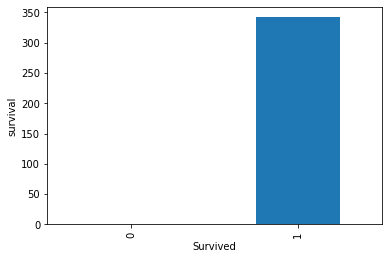

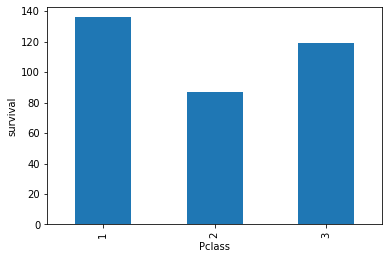

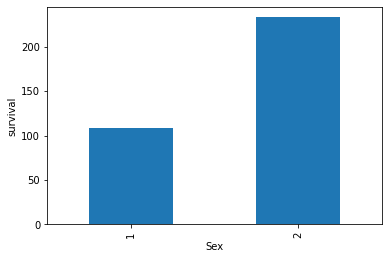

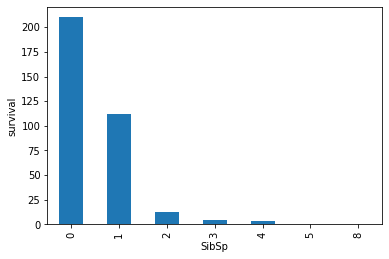

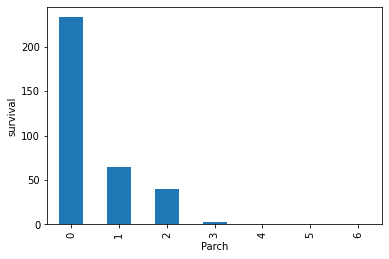

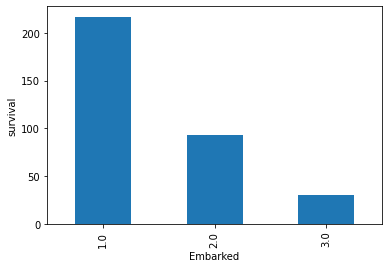

In [13]:
for i in discret_feature :
    data = train.copy()
    data.groupby(i)['Survived'].sum().plot.bar()
    plt.xlabel(i)
    plt.ylabel('survival')
    plt.show()

# **Continuous features**

In [14]:
con_features = [i for i in feature_numeric.columns if i not in discret_feature+['PassengerId']]
con_features

['Age', 'Fare']

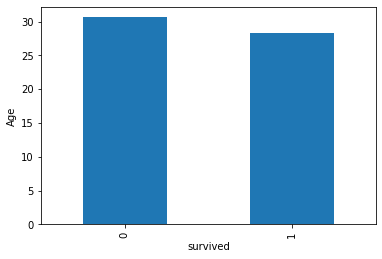

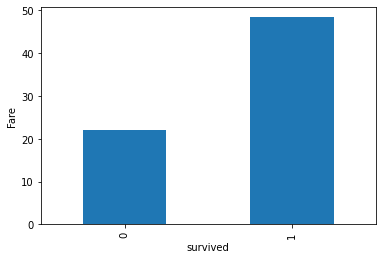

In [15]:
for i in con_features :
    data = train.copy()
    data.groupby('Survived')[i].mean().plot.bar()
    plt.xlabel('survived')
    plt.ylabel(i)
    plt.show()

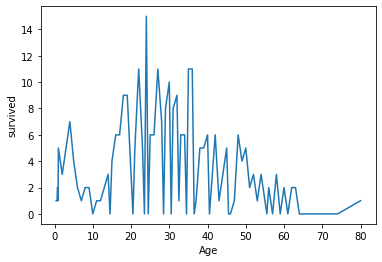

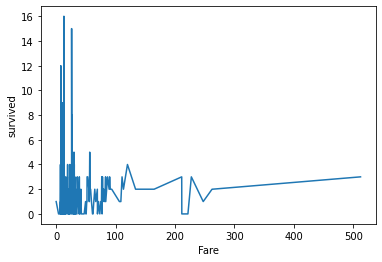

In [16]:
for i in con_features :
    data = train.copy()
    data.groupby(i)['Survived'].sum().plot()
    plt.xlabel(i)
    plt.ylabel('survived')
    plt.show()

In [17]:
train[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [18]:
train_data = cleaning_data(train)
test_data = cleaning_data(test)

In [19]:
"""from sklearn.tree import DecisionTreeClassifier
y = train_data['Survived']
X = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x_test =  test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)"""

"from sklearn.tree import DecisionTreeClassifier\ny = train_data['Survived']\nX = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]\nx_test =  test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]\nclf = tree.DecisionTreeClassifier()\nclf = clf.fit(X, y)"

In [20]:
from sklearn.naive_bayes import GaussianNB
y = train_data['Survived']
X = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x_test =  test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
gnb = GaussianNB()
gnb = gnb.fit(X, y)

In [21]:
x_test = x_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [22]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [23]:
from sklearn.metrics import accuracy_score

sub = pd.read_csv('../input/titanic/gender_submission.csv')
acc = accuracy_score(sub['Survived'], y_pred)
acc

0.9234449760765551

In [24]:
sub["Survived"] = y_pred
sub.to_csv("submission.csv", index=False)